In [9]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import os # file handling

In [10]:
# Define the path to the CSV fil. Get the current working directory
current_dir = os.getcwd()

# Define the relative path to the data folder
data_folder = os.path.join(current_dir, '..', 'data')

# Define the full path to the CSV file
csv_file_path = os.path.join(data_folder, 'patient_health.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

In [ ]:
# Overview of the dataset
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        5000 non-null   int64  
 1   Age              4997 non-null   float64
 2   Gender           4997 non-null   object 
 3   Diagnosis        4999 non-null   object 
 4   AppointmentDate  4998 non-null   object 
 5   Outcome          4998 non-null   object 
 6   GPPractice       4999 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB
None


In [12]:
 # Summary statistics
print(df.describe()) 

         PatientID          Age
count  5000.000000  4997.000000
mean   2500.500000    53.320392
std    1443.520003    20.765649
min       1.000000    18.000000
25%    1250.750000    35.000000
50%    2500.500000    53.000000
75%    3750.250000    72.000000
max    5000.000000    89.000000


In [15]:
# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())
# Display the last few rows of the DataFrame to confirm it's loaded correctly
print(df.tail())

   PatientID   Age Gender     Diagnosis AppointmentDate         Outcome  \
0          1  43.0      M        Asthma      01/01/2024  Did Not Attend   
1          2  42.0      F      Diabetes      02/01/2024        Attended   
2          3  57.0      M      Diabetes      03/01/2024        Attended   
3          4  76.0      F  Hypertension      04/01/2024        Attended   
4          5  63.0      F        Asthma      05/01/2024        Attended   

  GPPractice  
0       C789  
1       A123  
2       D012  
3       E345  
4       C789  
      PatientID   Age Gender     Diagnosis AppointmentDate         Outcome  \
4995       4996  60.0      M      Diabetes      30/07/2025        Attended   
4996       4997  50.0      F      Diabetes      21/04/2026        Attended   
4997       4998  37.0      F  Hypertension      02/05/2026  Did Not Attend   
4998       4999  66.0      M        Asthma      31/05/2025        Attended   
4999       5000  74.0      F  Hypertension      28/05/2025  Did Not A

In [16]:
# Check for missing values
print(df.isnull().sum())

PatientID          0
Age                3
Gender             3
Diagnosis          1
AppointmentDate    2
Outcome            2
GPPractice         1
dtype: int64


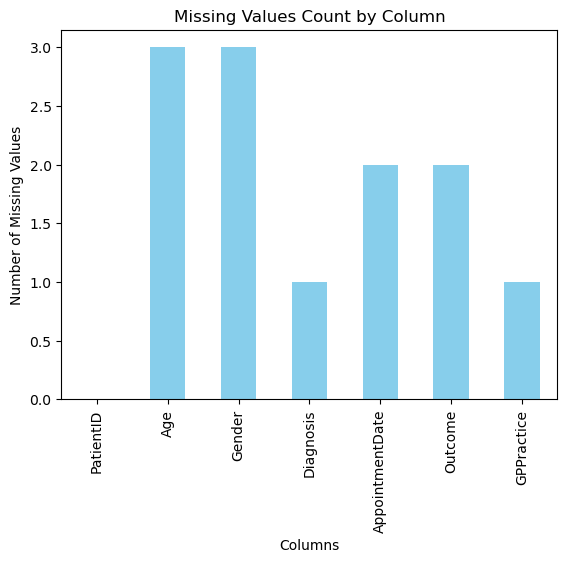

In [17]:
# Count missing values for each column
missing_values = df.isnull().sum()

# Plot the missing values as a bar plot
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

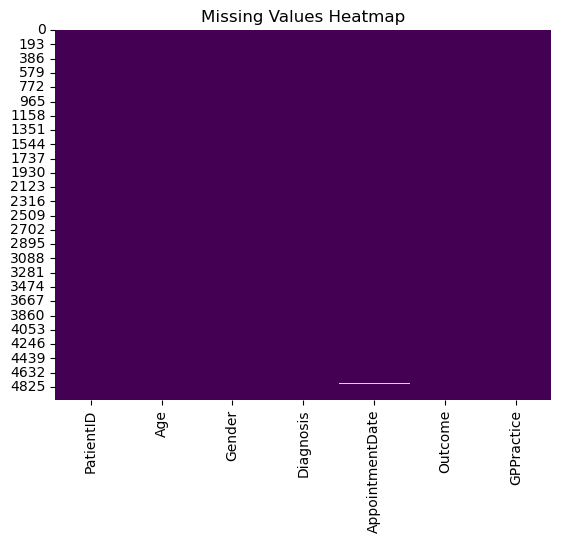

In [18]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

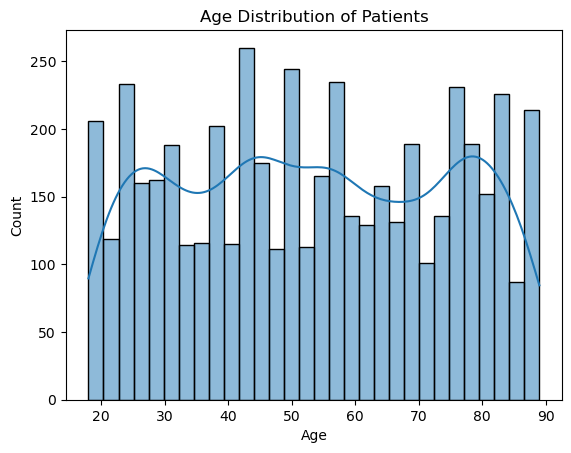

In [19]:
# Distribution of patient ages

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

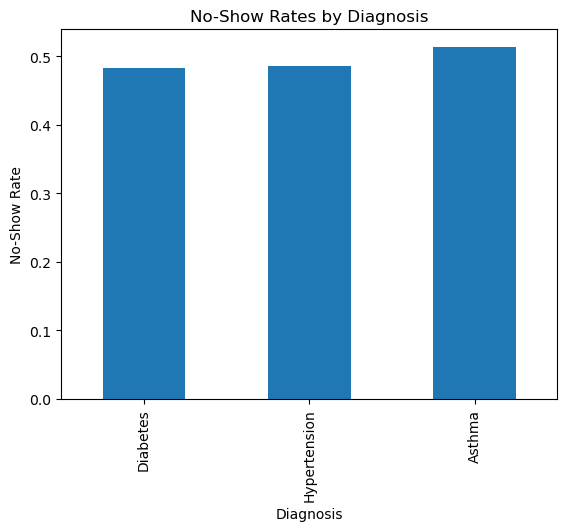

In [20]:
# Calculate no-show rates per diagnosis
no_show_rates = df.groupby('Diagnosis')['Outcome'].apply(lambda x: (x == 'Did Not Attend').mean())

# Plot the no-show rates
no_show_rates.sort_values().plot(kind='bar')
plt.title("No-Show Rates by Diagnosis")
plt.ylabel("No-Show Rate")
plt.xlabel("Diagnosis")
plt.show()

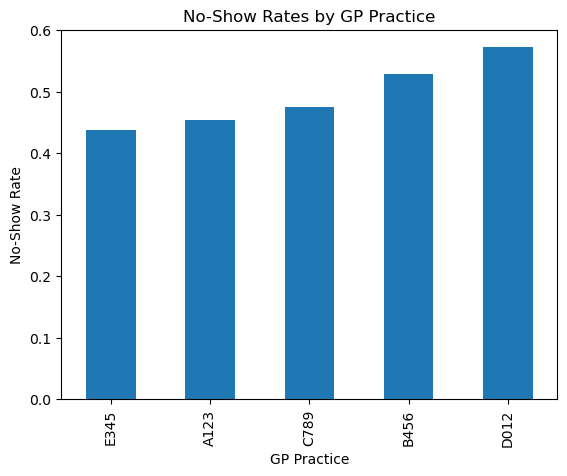

In [21]:
# Calculate no-show rate per GP practice
no_show_gp = df.groupby("GPPractice")["Outcome"].apply(lambda x: (x == 'Did Not Attend').mean())

# Plot the no-show rates
no_show_gp.sort_values().plot(kind='bar')
plt.title("No-Show Rates by GP Practice")
plt.ylabel("No-Show Rate")
plt.xlabel("GP Practice")
plt.show()

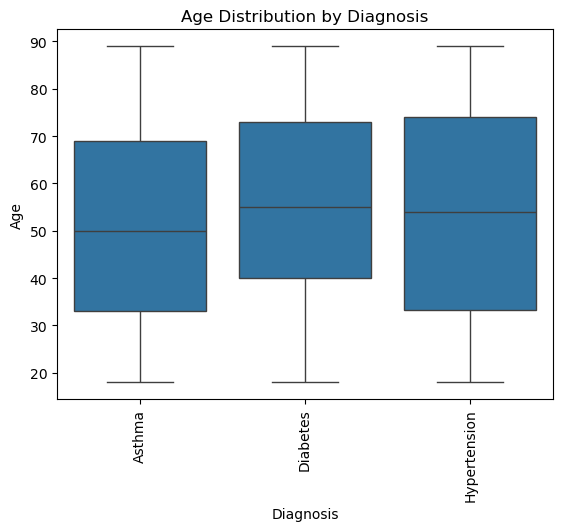

In [22]:
# Distribution of ages by diagnosis
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.xticks(rotation=90)
plt.title("Age Distribution by Diagnosis")
plt.show()

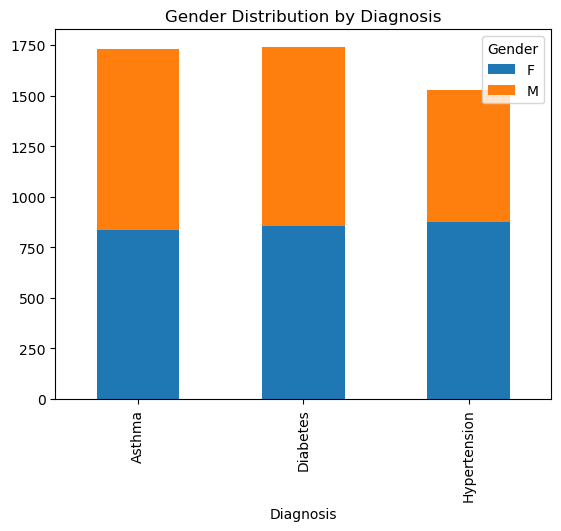

In [23]:
# Proportion of male and female patients per diagnosis 
gender_distribution = df.groupby(['Diagnosis', 'Gender']).size().unstack()
gender_distribution.plot(kind='bar', stacked=True)
plt.title("Gender Distribution by Diagnosis")
plt.show()

In [24]:
# Select relevant features
features = ['Age', 'Gender', 'Diagnosis', 'GPPractice']

# Create the target variable
df['MissedAppointment'] = df['Outcome'].apply(lambda x: 1 if x == 'Did Not Attend' else 0)

# Handle missing values by filling them with the mode for categorical variables and mean for numerical variables
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Diagnosis'].fillna(df['Diagnosis'].mode()[0], inplace=True)
df['GPPractice'].fillna(df['GPPractice'].mode()[0], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df[features], columns=['Gender', 'Diagnosis', 'GPPractice'], drop_first=True)

# Combine the encoded features with the target variable
prepared_df = pd.concat([df_encoded, df['MissedAppointment']], axis=1)

# Display the prepared dataset
print(prepared_df.head())

    Age  Gender_M  Diagnosis_Diabetes  Diagnosis_Hypertension  \
0  43.0      True               False                   False   
1  42.0     False                True                   False   
2  57.0      True                True                   False   
3  76.0     False               False                    True   
4  63.0     False               False                   False   

   GPPractice_B456  GPPractice_C789  GPPractice_D012  GPPractice_E345  \
0            False             True            False            False   
1            False            False            False            False   
2            False            False             True            False   
3            False            False            False             True   
4            False             True            False            False   

   MissedAppointment  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  


C:\Users\StanleyEwenike\AppData\Local\Temp\ipykernel_10920\1454517671.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\StanleyEwenike\AppData\Local\Temp\ipykernel_10920\1454517671.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

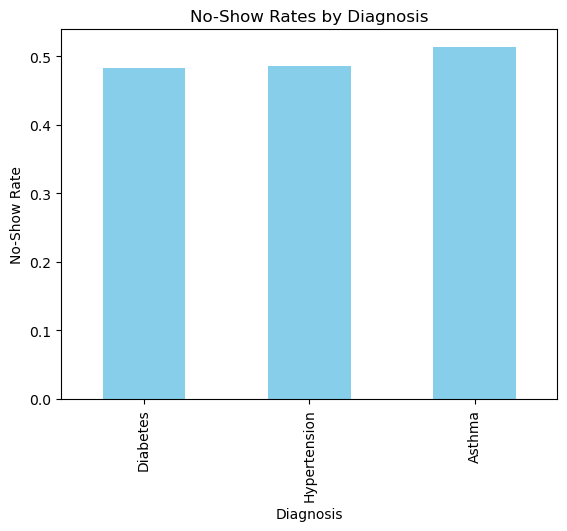

In [25]:
# Plot the no-show rates by diagnosis
no_show_rates.sort_values().plot(kind='bar', color='skyblue')
plt.title("No-Show Rates by Diagnosis")
plt.ylabel("No-Show Rate")
plt.xlabel("Diagnosis")
plt.show()

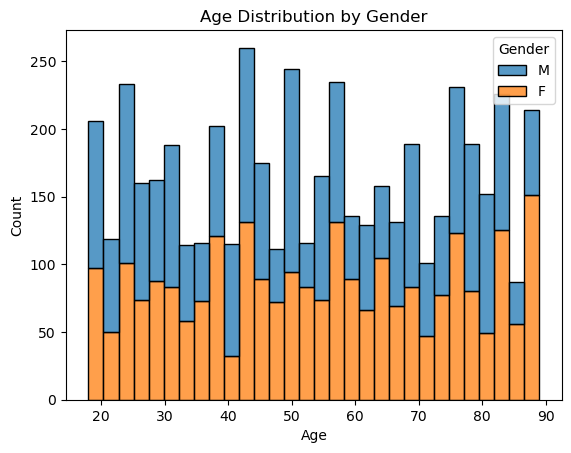

In [26]:
# Plot the distribution of ages by gender
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=30)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()